## Linear Regression: The Big Picture

Is x a useful predictor for y?  If you are looking at a linear relationship between two variables, then you want to use a linear regression model where you are estimate the best fitting line for your data.  The target or outcome variable is what you are trying to predict or estimate.  The explanatory or feature variable is what you use to predict.  

### Linear Regression Equation

Equation for a line:        Y = mx + b

Linear Regression Equation:    y_pred = b0 + b1*x

b0 and b1 are the coefficients (estimates)

b0 is the y-intercept value when x = 0. It is a constant.

b1 is the estimated change in y for a 1-unit increase in x. It is the slope coefficient.

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [2]:
# Read in file
df1 = pd.read_csv('activity.csv')
df1.head()

,activity,health_score
0,11,10
1,79,96
2,39,37
3,33,35
4,1,4


In [3]:
df1.describe()

,activity,health_score
count,50.000000,50.000000
mean,42.660000,51.220000
std,24.668918,30.064753
min,0.000000,0.000000
25%,24.750000,28.000000
50%,44.500000,46.000000
75%,61.000000,77.750000
max,84.000000,98.000000


### Basic Linear Regression Model

We want to estimate a simple model to see what is the relationship between number of hours of physical activity and its effect on health.  The health score ranges from 0 to 100 with 0 being worst health and 100 being excellent health.  Number of hours of physical activity in a week consists of physical labor, exercise, housework, walking, and etc. It ranges from 0 to 84. Both variables are quantitative variables.

Null hypothesis H0:   no effect, b1=0
    
Alternative hypothesis H1: effect exist, b1 is not equal to 0

In [4]:
# Linear Regression Model
model = sm.OLS.from_formula("health_score ~ activity", data=df1)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           health_score   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     738.2
Date:                Sun, 16 Feb 2020   Prob (F-statistic):           8.49e-31
Time:                        10:30:03   Log-Likelihood:                -170.71
No. Observations:                  50   AIC:                             345.4
Df Residuals:                      48   BIC:                             349.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8411      2.137      0.394      0.696      -3.455       5.137
activity       1.1809      0.043     27.170      0.000       1.094       1.268
==============================================================================
Omnibus:                       15.541   Durbin-Watson:                   1.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.112
Skew:                           0.695   Prob(JB):                     5.30e-09
Kurtosis:                       7.045   Cond. No.                         99.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Interpretations and Inferences

Confidence Interval:  It's the range in which coefficients are likely to fall(with a likelihood of 95%).

Standard Error:  It's a measure of the accuracy of the coefficients.  The lower it is, then the higher level of accuracy.

Interpretation:  We have a constant coefficient of 0.8411. Whe physical activity is 0 hours, then the health score is 0.84 units. The coefficient estimate for number of hours is 1.18. The interpretation is that for a unit increase in x, namely a 1-hour increase in physical activity, there is a 1.18 increase in one's health score. 

In [5]:
# Let's take a look at correlation, pearson's r
r = df1['activity'].corr(df1['health_score'])
print(r)

0.9689930516549492


In [6]:
# Let's take a look at r_squared
r_squared = 0.9689930516549492**2
r_squared

0.9389475341555711

R-Squared value: it tells you how much variance is explained by the model.  In particular, 94% of the variance is explained by a single variable, namely number of hours of physical activity in a week.  As we would expect, there is a positive and strong relationship between physical activity, measured in terms of number of hours, and having a higher health score, indicating better health.

P-value:  When you have a p-value of less than 0.05, then it is considered to be statistically significant. We can reject the null hypothesis.  Our coefficient estimate, b1, is not equal to zero. 


The inference drawn is that the number of hours of physical activity can help us predict a person's health score. There is a positive and strong relationship.  We base this inference drawn from hypothesis testing and confidence intervals.

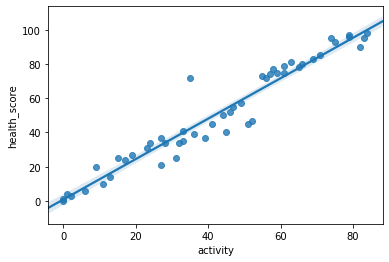

In [8]:
# Regression plot
# The regression line gives us a way to predict y, given x
import seaborn as sns
sns.regplot(y="health_score", x="activity",data = df1);

In [ ]:
# end